In [1]:
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import numpy.linalg as LA
from pprint import pprint
import pandas as pd
import random
from gensim.models import Word2Vec as word2vec

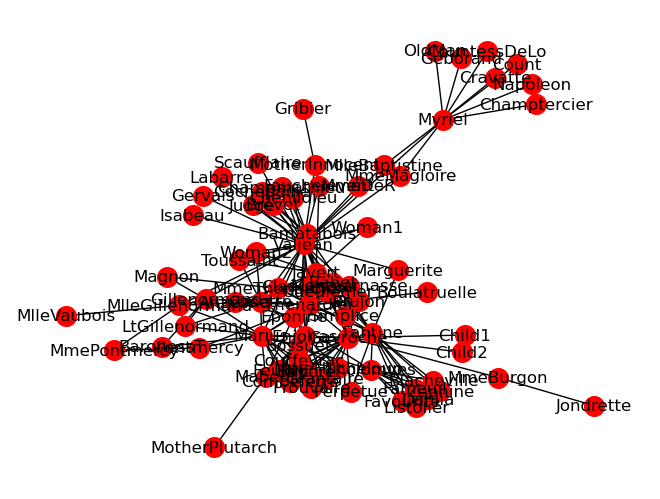

In [2]:
#ネットワークの読み込みと可視化
G=nx.read_gml("C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\test data\\networkx text\\lesmis.gml") #gmlデータの読み込み
nx.draw_spring(G,node_size=200,node_color="red",with_labels=True) #ノードの大きさ200　ラベル表示

In [3]:
#ネットワーク情報
print(nx.number_of_nodes(G)) #ノード数
print(nx.number_of_edges(G)) #エッジ数
print(G.nodes()) 
print(G.edges()) 

77
254
['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
[('Myriel'

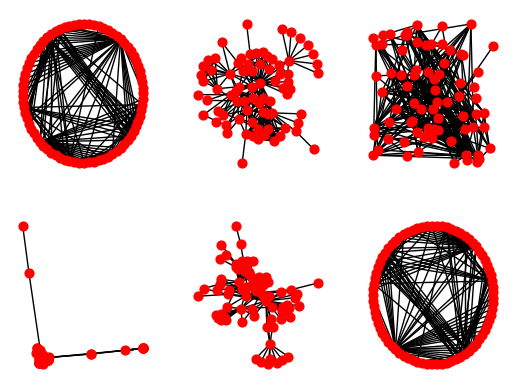

In [4]:
#6つの手法で可視化
plt.subplot(231) #figの2行3列の1つ目
nx.draw_circular(G,node_size=40,node_color="red",with_labels=False) #ノードを円周上に配置　
plt.subplot(232)
nx.draw_kamada_kawai(G,node_size=40,node_color="red",with_labels=False) #ノードを力学モデルで配置
plt.subplot(233)
nx.draw_random(G,node_size=40,node_color="red",with_labels=False) #ノードをランダムに配置
plt.subplot(234)
nx.draw_spectral(G,node_size=40,node_color="red",with_labels=False) #ネットワーク行列の固有ベクトルでノードを配置
plt.subplot(235)
nx.draw_spring(G,node_size=40,node_color="red",with_labels=False) #ノードを力学モデルで配置
plt.subplot(236)
nx.draw_shell(G,node_size=40,node_color="red",with_labels=False) #ノードを同心円上に配置

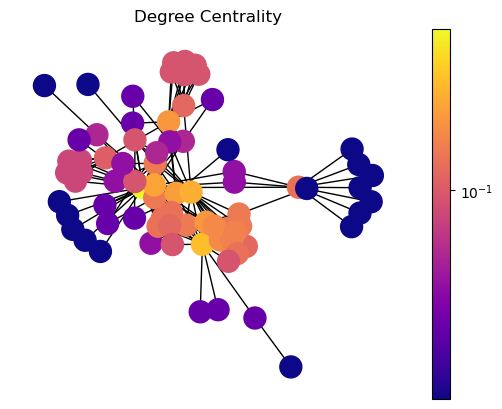

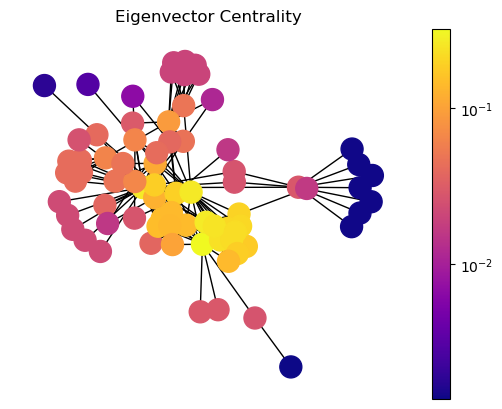

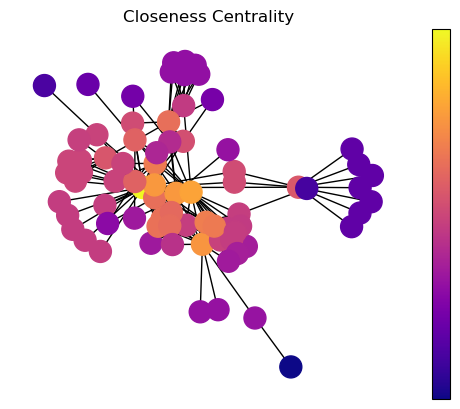

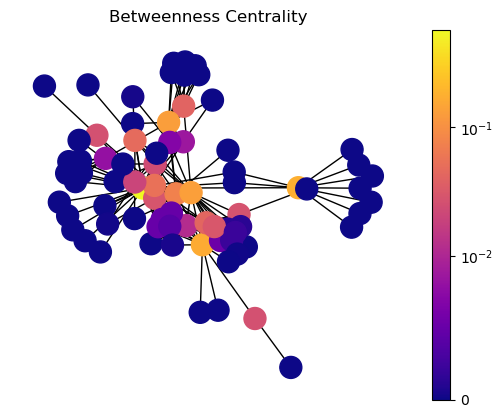

In [5]:
#中心性の計算
def draw_h(G,pos,measures,measure_name): #ネットワークと中心性を表示する関数
    nodes=nx.draw_networkx_nodes(G,pos,node_size=250, #posはノード配置の設定　measuresは中心性の種類
                                 cmap=plt.cm.plasma,
                                 node_color=list(measures.values()), #中心性の値で色を設定
                                 nodelist=list(measures.keys())) #このリストのみ描画する keysはただの各ノードindex
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01,linscale=1)) #ノードの色の基準を設定
    #labels=nx.draw_networkx_labels(G,pos) #ノードラベルの描画
    edges=nx.draw_networkx_edges(G,pos) #エッジの描画
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis("off")
    plt.show()
    
pos=nx.spring_layout(G) #力学モデルでノード配置
draw_h(G,pos,nx.degree_centrality(G),"Degree Centrality") #次数中心性
draw_h(G,pos,nx.eigenvector_centrality(G),"Eigenvector Centrality") #固有ベクトル中心性
draw_h(G,pos,nx.closeness_centrality(G),"Closeness Centrality") #近接中心性
draw_h(G,pos,nx.betweenness_centrality(G),"Betweenness Centrality") #媒介中心性

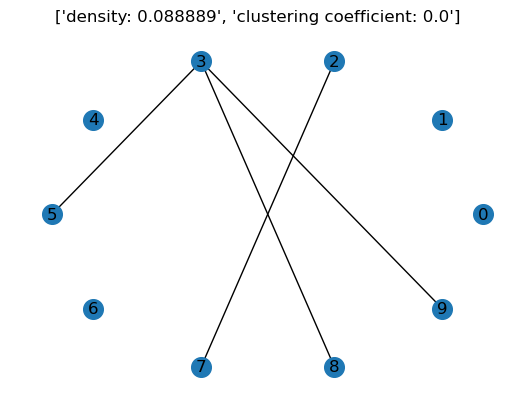

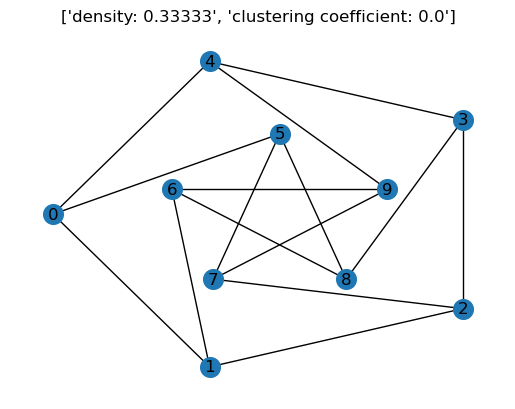

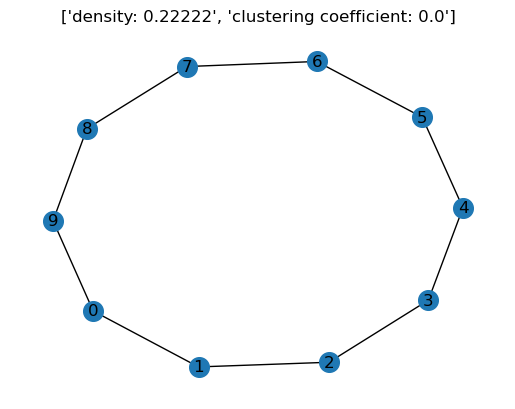

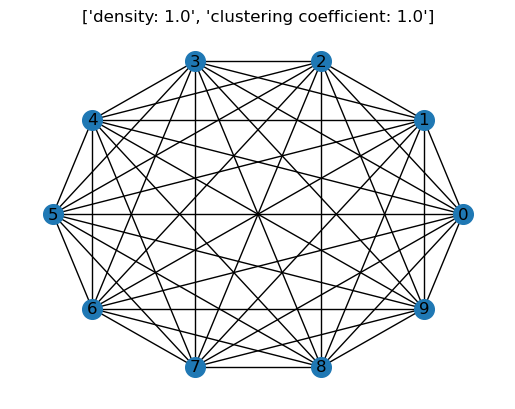

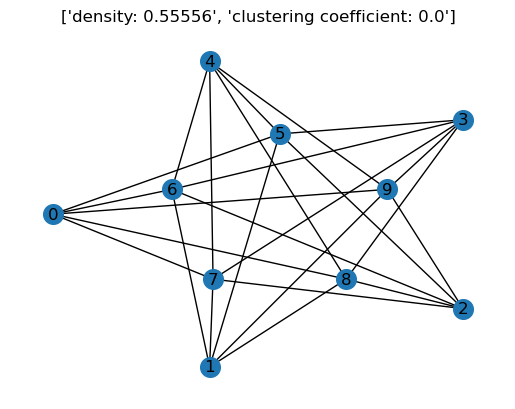

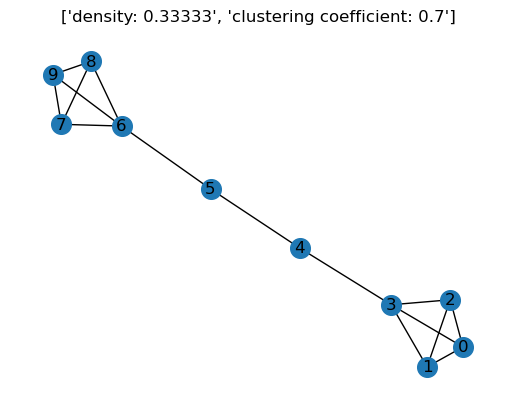

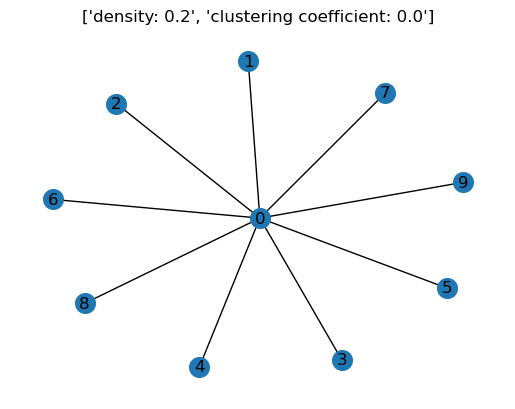

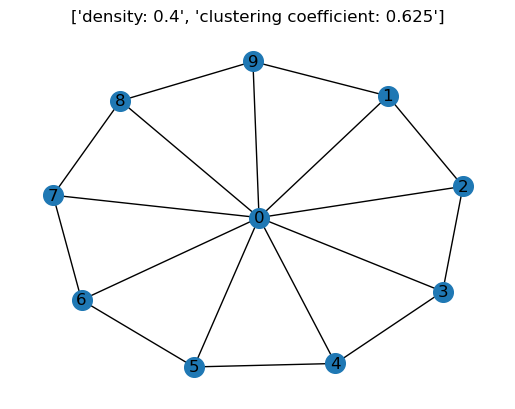

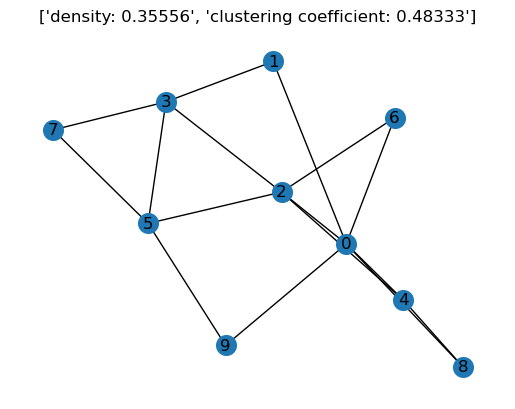

In [6]:
#ネットワーク密度とクラスタ係数
def draw_m(G,pos): #グラフを描画して、そのグラフのネットワーク密度とクラスタ係数を表示する関数
    nodes=nx.draw_networkx_nodes(G,pos,node_size=200)
    labels=nx.draw_networkx_labels(G,pos)
    edges=nx.draw_networkx_edges(G,pos)
    plt.title(["density: {:.5}".format(nx.density(G)),"clustering coefficient: {:.5}".format(nx.average_clustering(G))])
    plt.axis("off")
    plt.show()
 
rnd=nx.gnp_random_graph(10,0.1) #ランダムグラフ
pos=nx.circular_layout(rnd)
draw_m(rnd,pos)

petersen=nx.petersen_graph() #petersenグラフ
pos=nx.shell_layout(petersen,nlist=[range(5,10),range(5)])  #nlistはshellを構成するノードのlist
draw_m(petersen,pos)

cycle=nx.cycle_graph(10) #サイクルグラフ
pos=nx.spring_layout(cycle)
draw_m(cycle,pos)

K_10=nx.complete_graph(10) #完全グラフ
pos=nx.circular_layout(K_10)
draw_m(K_10,pos)

K_5_5=nx.complete_bipartite_graph(5,5) #完全２部グラフ
pos=nx.shell_layout(K_5_5,nlist=[range(5,10),range(5)]) 
draw_m(K_5_5,pos)

barbell=nx.barbell_graph(4,2) #barbellグラフ
pos=nx.spring_layout(barbell)
draw_m(barbell,pos)

star=nx.star_graph(9) #starグラフ
pos=nx.spring_layout(star)
draw_m(star,pos)

wheel=nx.wheel_graph(10) #wheelグラフ
pos=nx.spring_layout(wheel)
draw_m(wheel,pos)

ba=nx.barabasi_albert_graph(10,2) #barabasi_albertモデルのグラフ
pos=nx.spring_layout(ba)
draw_m(ba,pos)

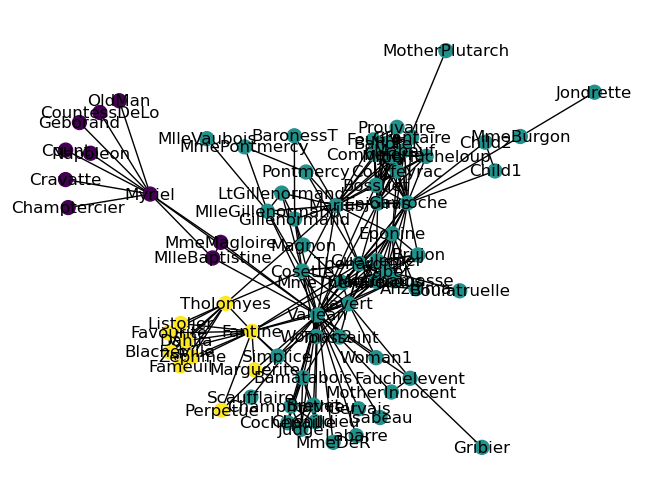

In [7]:
#コミュニティ抽出
df=pd.DataFrame({"ID":G.nodes(),"myvalue":[0]*len(G.nodes())}) #IDに各ノードのラベル、myvalueに0の値を設定
communities_generator=community.centrality.girvan_newman(G,most_valuable_edge=None) #Girvan–Newman methodでグラフからコミュニティを抽出　返り値はiterator
top_communities=next(communities_generator) #ネットワークから媒介中心性の最も高いエッジを削除して再計算し、コミュニティ抽出
second_communities=next(communities_generator) #top_communitiesから媒介中心性の最も高いエッジを削除して再計算し、再度コミュニティ抽出
for m in range(len(second_communities)): #second_communitiesのコミュニティの数だけ繰り返す
    for n in second_communities[m]:
        df.loc[df.ID==n,'myvalue']=m #ノードごとに所属するコミュニティに従った番号を設定
nx.draw_spring(G,node_color=df['myvalue'],node_size=100,with_labels=True)

sparse adjacency matrix:
  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 2)	1
dense adjacency matrix:
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
degree: [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
degree histogram [0, 1, 3, 1, 1]


<BarContainer object of 5 artists>

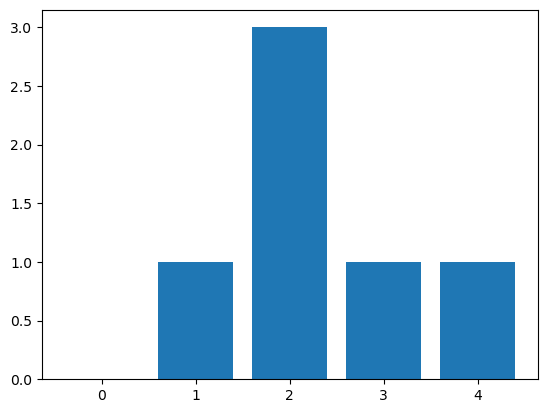

In [8]:
#ネットワークの基本的な分析
G=nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","B"),("B","C"),("B","D"),("C","D"),("A","E"),("C","E"),("C","F")])

print("sparse adjacency matrix:")
print(nx.adjacency_matrix(G)) #疎行列として保持された隣接行列を表示
print("dense adjacency matrix:")
print(nx.adjacency_matrix(G).todense()) #隣接行列を通常の行列で表示

print("degree:",G.degree()) #ノードと次数有向グラフ
print("degree histogram",nx.degree_histogram(G)) #次数分布
plt.bar(range(5),nx.degree_histogram(G)) #次数分布のグラフ x軸は次数、y軸はその次数を持つノードの数

all paths from D to E
['D', 'E']
['D', 'A', 'C', 'B', 'F', 'E']
shortest path length from D to E: 1
shortest path length from E to D: 4
-----------edeg D to E is deleted-----------
all paths from D to E
['D', 'A', 'C', 'B', 'F', 'E']
shortest path length from D to E: 5
shortest path length from E to D: 4


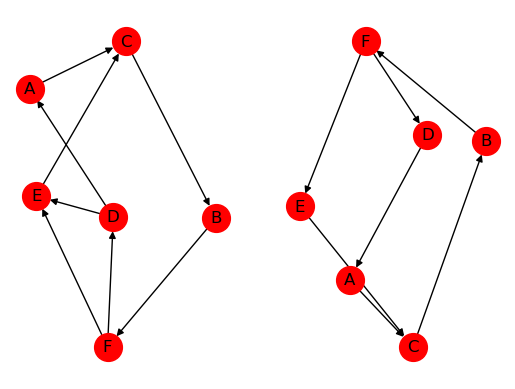

In [9]:
#連結性
G=nx.DiGraph() #有向グラフ
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","C"),("C","B"),("B","F"),("F","D"),("F","E"),("D","E"),("E","C"),("D","A")])
plt.subplot(121)
nx.draw(G,node_size=400,node_color="red",with_labels=True)
print("all paths from D to E")
for path in nx.all_simple_paths(G,"D","E"): #DからEへのパス
    print(path)
print("shortest path length from D to E:",nx.shortest_path_length(G,"D","E")) #DからEへの最短パス長
print("shortest path length from E to D:",nx.shortest_path_length(G,"E","D")) #EからDへの最短パス長

print("-----------edeg D to E is deleted-----------")

G.remove_edges_from([("D","E")]) #DからEへのエッジを削除
plt.subplot(122)
nx.draw(G,node_size=400,node_color="red",with_labels=True)
print("all paths from D to E")
for path in nx.all_simple_paths(G,"D","E"): #DからEへのパス
    print(path)
print("shortest path length from D to E:",nx.shortest_path_length(G,"D","E")) #DからEへの最短パス長
print("shortest path length from E to D:",nx.shortest_path_length(G,"E","D")) #EからDへの最短パス長

{('A', 'C'): 1.0, ('A', 'D'): 1.0, ('B', 'C'): 1.0, ('B', 'F'): 1.0, ('C', 'E'): 1.0, ('D', 'F'): 1.0, ('D', 'E'): 1.0, ('E', 'F'): 1.0}
cut size of A and B {('F', 'B'), ('C', 'B')}
max flow of A and B 2.0
-----------edeg A to C is deleted-----------
cut size of A and B {('A', 'D')}
max flow of A and B 1.0


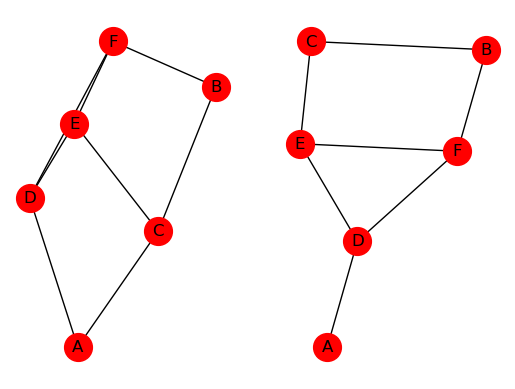

In [10]:
#グラフの最大流、最小カット
G=nx.Graph() 
G.add_nodes_from(["A","B","C","D","E","F"])
G.add_edges_from([("A","C"),("C","B"),("B","F"),("F","D"),("F","E"),("D","E"),("E","C"),("D","A")],capacity=1.0) #エッジにcapacityという属性を設定
capa=nx.get_edge_attributes(G,"capacity") #エッジの属性を取得
print(capa)
plt.subplot(121)
nx.draw(G,node_size=400,node_color="red",with_labels=True)
cut_edges=nx.algorithms.connectivity.minimum_edge_cut(G,"A","B") #ノードAとBを非連結にするための最小カット
print("cut size of A and B",cut_edges)
flow_value,flow_dict=nx.algorithms.flow.maximum_flow(G,"A","B") #ノードAとBの間の最大流
print("max flow of A and B",flow_value)

print("-----------edeg A to C is deleted-----------")

G.remove_edges_from([("A","C")])
plt.subplot(122)
nx.draw(G,node_size=400,node_color="red",with_labels=True)
cut_edges=nx.algorithms.connectivity.minimum_edge_cut(G,"A","B") #ノードAとBを非連結にするための最小カット
print("cut size of A and B",cut_edges)
flow_value,flow_dict=nx.algorithms.flow.maximum_flow(G,"A","B") #ノードAとBの間の最大流
print("max flow of A and B",flow_value)

CC of complete graph 1.0
CC of bipartite graph 0
CC of random graph 0.09523809523809523


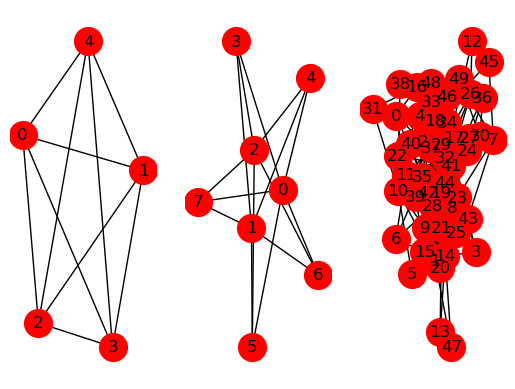

In [11]:
#ネットワークのクラスタ係数
K_5=nx.complete_graph(5)  #完全グラフ
plt.subplot(131)
nx.draw(K_5,node_size=400,node_color="red",with_labels=True)
K_3_5=nx.complete_bipartite_graph(3,5) #２部グラフ
plt.subplot(132)
nx.draw(K_3_5,node_size=400,node_color="red",with_labels=True) 
er=nx.erdos_renyi_graph(50,0.15) #ランダムグラフ
plt.subplot(133)
nx.draw(er,node_size=400,node_color="red",with_labels=True)
#各グラフのクラスタ係数　0番目ノードのクラスタ係数を表示
print("CC of complete graph",nx.clustering(K_5,0))
print("CC of bipartite graph",nx.clustering(K_3_5,0))
print("CC of random graph",nx.clustering(er,0))

assortativity of star graph -1.0
assortativity of Barabasi-Albert graph -0.431
assortativity of barbell graph -0.05


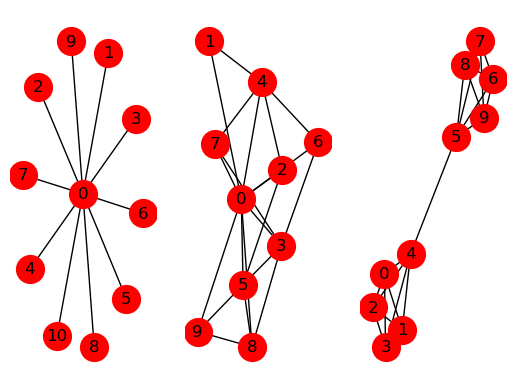

In [12]:
#ネットワークの次数相関
star=nx.star_graph(10) #starグラフ
plt.subplot(131)
nx.draw(star,node_size=400,node_color="red",with_labels=True)
ba=nx.barabasi_albert_graph(10,3) #Barabasi-Albertグラフ
plt.subplot(132)
nx.draw(ba,node_size=400,node_color="red",with_labels=True)
bg=nx.barbell_graph(5,0) #barbellグラフ
plt.subplot(133)
nx.draw(bg,node_size=400,node_color="red",with_labels=True)
#各グラフの次数相関
print("assortativity of star graph","{:.3}".format(nx.degree_pearson_correlation_coefficient(star,0)))
print("assortativity of Barabasi-Albert graph","{:.3}".format(nx.degree_pearson_correlation_coefficient(ba,0)))
print("assortativity of barbell graph","{:.3}".format(nx.degree_pearson_correlation_coefficient(bg,0)))

degree centrality: [0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151] max: 33
betweenness centrality: [0.43763528138528146, 0.053936688311688304, 0.14365680615680618, 0.011909271284271283, 0.0006313131313131313, 0.02998737373737374, 0.029987373737373736, 0.0, 0.05592682780182781, 0.0008477633477633478, 0.0006313131313131313, 0.0, 0.0, 

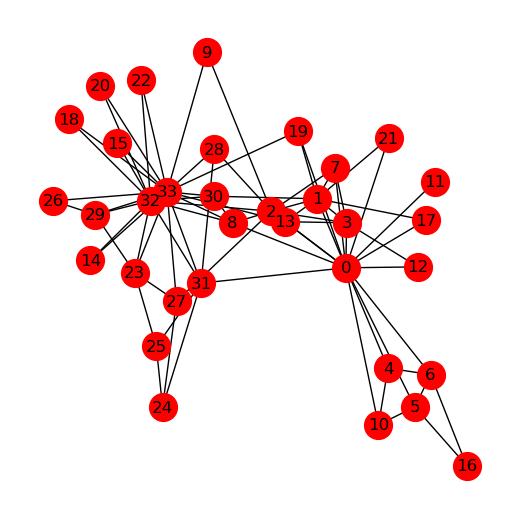

In [13]:
#ネットワークの中心性比較
G=nx.karate_club_graph() #空手グラフ
plt.figure(figsize=(5,5))
nx.draw_spring(G,node_size=400,node_color="red",with_labels=True)
v=list(nx.degree_centrality(G).values())
print("degree centrality:",v,"max:",np.argmax(v)) #次数中心性　各ノードの値と最大値を持つノード番号
v=list(nx.betweenness_centrality(G).values())
print("betweenness centrality:",v,"max:",np.argmax(v)) #媒介中心性　各ノードの値と最大値を持つノード番号
v=list(nx.closeness_centrality(G).values())
print("closeness centrality:",v,"max:",np.argmax(v)) #近接中心性　各ノードの値と最大値を持つノード番号
v=list(nx.eigenvector_centrality(G).values())
print("eigenvector centrality:",v,"max:",np.argmax(v)) #固有ベクトル中心性　各ノードの値と最大値を持つノード番号
v=list(nx.pagerank(G).values())
print("PageRank:",v,"max:",np.argmax(v)) #PageRank　各ノードの値と最大値を持つノード番号
v=list(nx.katz_centrality(G).values())
print("Katz centrality:",v,"max:",np.argmax(v)) #Katz中心性　各ノードの値と最大値を持つノード番号

BFS: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(2, 27), (31, 24), (8, 33), (1, 30), (2, 32), (2, 9), (5, 16), (2, 28), (31, 25)]
depth 3: [(32, 15), (33, 26), (32, 14), (32, 20), (27, 23), (32, 29), (32, 22), (32, 18)]
depth 4: []
DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
traversed nodes: [0, 1, 2, 3, 7, 12, 13, 33,

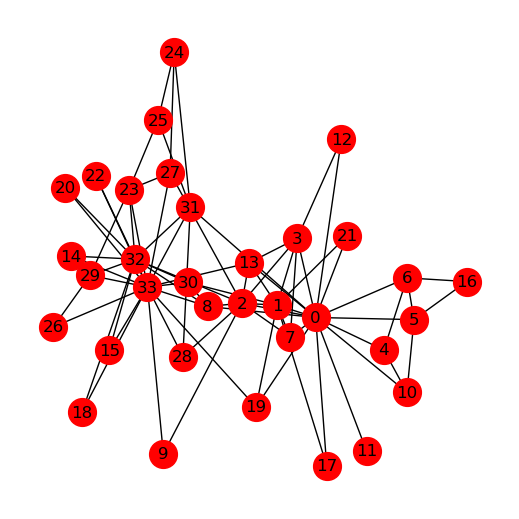

In [14]:
#経路探索（全てのエッジの距離が同じ場合）
G=nx.karate_club_graph()
plt.figure(figsize=(5,5))
nx.draw_spring(G,node_size=400,node_color="red",with_labels=True)
print("BFS:",list(nx.bfs_edges(G,source=0))) #ノード0からのBFS（幅優先探索）
d1=list(nx.bfs_edges(G,source=0,depth_limit=1)) #0から深さ1まで
print("depth 1:",d1)
d2=list(nx.bfs_edges(G,source=0,depth_limit=2)) #0から深さ2まで
print("depth 2:",list(set(d2)-set(d1))) #0から距離2のノードにつながる辺
d3=list(nx.bfs_edges(G,source=0,depth_limit=3)) #0から深さ3まで
print("depth 3:",list(set(d3)-set(d2))) #0から距離3のノードにつながる辺
d4=list(nx.bfs_edges(G,source=0,depth_limit=4)) #0から深さ4まで
print("depth 4:",list(set(d4)-set(d3))) #0から距離4のノードにつながる辺

print("DFS:",list(nx.dfs_edges(G,source=0))) #ノード0からのDFS（深さ優先探索）
print("traversed nodes:",list(nx.dfs_preorder_nodes(G,source=0))) #探索結果のノードのリスト

flow value from s to t: 3.0
the value of flow through edge s-b: 1.0
the value of flow through edge s-a: 2.0
min cut value between s and t: 3.0
reachable nodes from s: {'a', 'c', 's'}
unreachable nodes from s: {'t', 'e', 'd', 'b'}
cut set: [('c', 't'), ('s', 'b')]


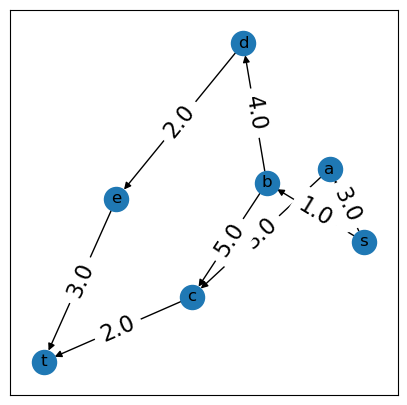

In [15]:
#経路探索（各エッジの距離が異なる場合）　最大流最小カット
G=nx.DiGraph()
G.add_edge("s","a",capacity=3.0)
G.add_edge("s","b",capacity=1.0)
G.add_edge("a","c",capacity=3.0)
G.add_edge("b","c",capacity=5.0)
G.add_edge("b","d",capacity=4.0)
G.add_edge("d","e",capacity=2.0)
G.add_edge("c","t",capacity=2.0)
G.add_edge("e","t",capacity=3.0)

plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edge_labels(G,pos,font_size=16,edge_labels={(u,v):d["capacity"] for u,v,d in G.edges(data=True)}) #edgeのcapacityを描画
nx.draw_networkx_labels(G,pos)

flow_value,flow_dict=nx.maximum_flow(G,"s","t") #ノードsとtの間の最大流、各辺の流量
print("flow value from s to t:",flow_value) #s-t間の最大流　s-b通過フローとs-a通過フローの最大値を足し合わせたもの
print("the value of flow through edge s-b:",flow_dict["s"]["b"]) #各s-t間フローのうち、s-bを途中で通過するものの許容された流量
print("the value of flow through edge s-a:",flow_dict["s"]["a"]) #各s-t間フローのうち、s-aを途中で通過するものの許容された流量

cut_value,partition=nx.minimum_cut(G,"s","t") #最小カットの値、最小カットでsから到達可能および到達不可能な頂点集合
reachable,non_reachable=partition
print("min cut value between s and t:",cut_value)
print("reachable nodes from s:",reachable) #最小カットのsから到達可能ノード
print("unreachable nodes from s:",non_reachable)

cutset=set() #集合
for u,nbrs in ((n,G[n]) for n in reachable): #各sから到達可能ノードとそこから矢印の向いたノード情報
    cutset.update((u,v) for v in nbrs if v in non_reachable) #矢印の向いたノードが最小カットのsから到達不可能ノードならばcutsetに加える
print("cut set:",sorted(cutset)) #最小カットの集合

before: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


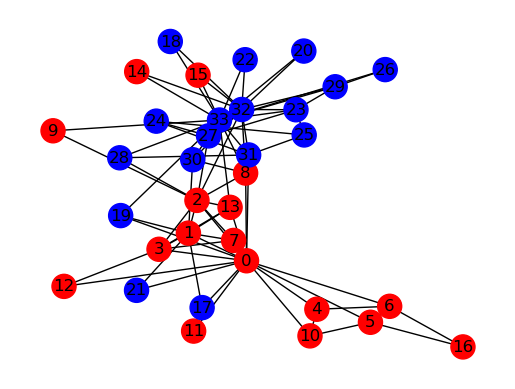

after: ({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21})


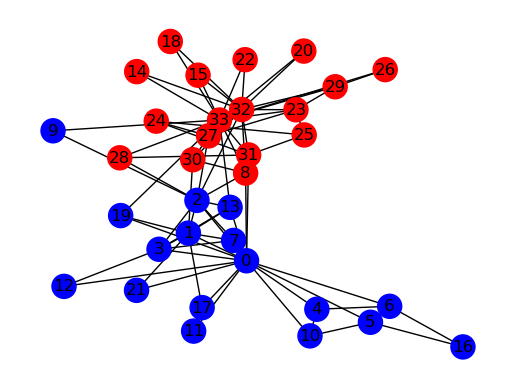

In [16]:
#ネットワーク分割
G=nx.karate_club_graph()
colors=["red","blue","green"]
pos=nx.spring_layout(G)

init_nodes=np.array_split(G.nodes(),2) #ネットワークのノードを{0...16}と{17...33}に２分割
init_partition=[set(init_nodes[0]),set(init_nodes[1])] #２つをset型に変更してリストに格納
print("before:",init_partition)

color_map_a=['black']*nx.number_of_nodes(G) #色の初期設定
counter=0
for c in init_partition:
    for n in c:
        color_map_a[n]=colors[counter] #ネットワークごとに色を設定
    counter+=1
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos,node_color=color_map_a)
nx.draw_networkx_labels(G,pos)
plt.axis("off")
plt.show()

lst_b=kernighan_lin_bisection(G,partition=init_partition) #Kernighan-Linアルゴリズムでネットワーク分割
print("after:",lst_b)
color_map_b=['black']*nx.number_of_nodes(G)
counter=0
for c in lst_b:
    for n in c:
        color_map_b[n]=colors[counter]#ネットワークごとに色を設定
    counter+=1
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos,node_color=color_map_b)
nx.draw_networkx_labels(G,pos)
plt.axis("off")
plt.show()

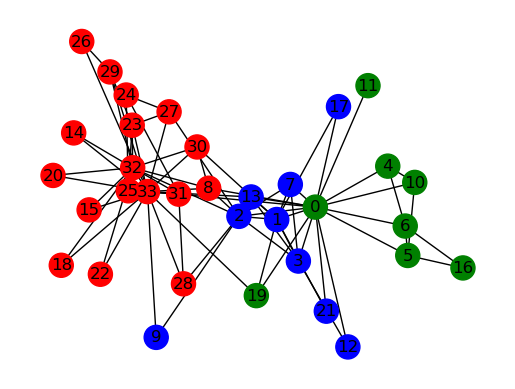

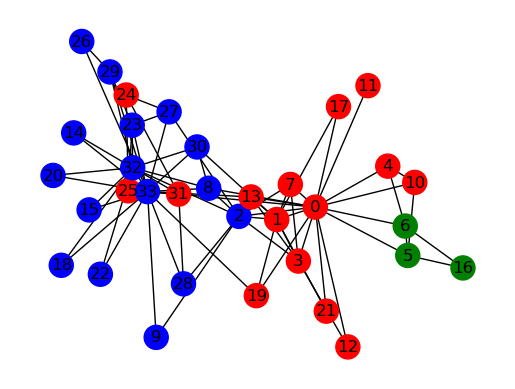

In [17]:
#コミュニティ抽出
G=nx.karate_club_graph()
colors=["red","blue","green"]
pos=nx.spring_layout(G)

lst_m=greedy_modularity_communities(G) #CMM法
color_map_m=['black']*nx.number_of_nodes(G)
counter=0
for c in lst_m:
    for n in c:
        color_map_m[n]=colors[counter]
    counter+=1
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos,node_color=color_map_m)
nx.draw_networkx_labels(G,pos)
plt.axis("off")
plt.show()

lst_l=label_propagation_communities(G) #ラベル運搬コミュニティ抽出
color_map_l=['black']*nx.number_of_nodes(G)
counter=0
for c in lst_l:
    for n in c:
        color_map_l[n]=colors[counter]
    counter+=1
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos,node_color=color_map_l)
nx.draw_networkx_labels(G,pos)
plt.axis("off")
plt.show()

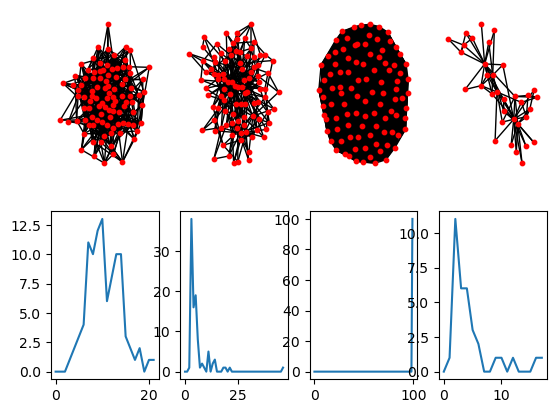

In [18]:
#ネットワークモデル
er=nx.erdos_renyi_graph(100,0.1)
plt.subplot(241)
nx.draw(er,node_size=10,node_color="red")
plt.subplot(245)
plt.plot(nx.degree_histogram(er))
ba=nx.barabasi_albert_graph(100,3)
plt.subplot(242)
nx.draw(ba,node_size=10,node_color="red")
plt.subplot(246)
plt.plot(nx.degree_histogram(ba))
K_100=nx.complete_graph(100)
plt.subplot(243)
nx.draw(K_100,node_size=10,node_color="red")
plt.subplot(247)
plt.plot(nx.degree_histogram(K_100))
karate=nx.karate_club_graph()
plt.subplot(244)
nx.draw(karate,node_size=10,node_color="red")
plt.subplot(248)
plt.plot(nx.degree_histogram(karate))

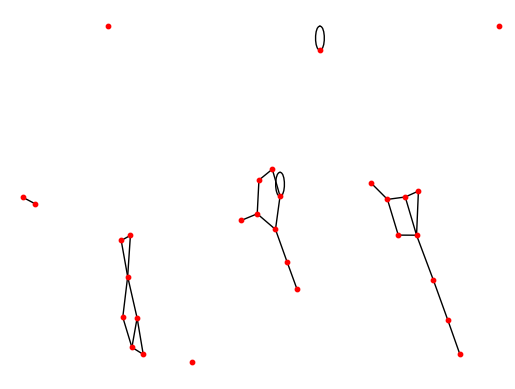

In [19]:
deg_seq=[0,1,1,2,2,2,2,3,3,4] #ノードの次数列
plt.subplot(1,3,1)
G1=nx.configuration_model(deg_seq) #コンフィギュレーションモデル
nx.draw_spring(G1,node_size=10,node_color="red")
plt.subplot(1,3,2)
G2=nx.configuration_model(deg_seq) #コンフィギュレーションモデル
nx.draw_spring(G2,node_size=10,node_color="red")
plt.subplot(1,3,3)
G3=nx.configuration_model(deg_seq) #コンフィギュレーションモデル
nx.draw_spring(G3,node_size=10,node_color="red")

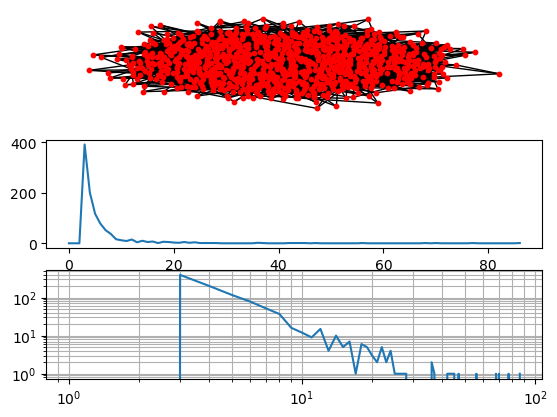

In [20]:
#スケールフリーグラフ
ba=nx.barabasi_albert_graph(1000,3)
plt.subplot(3,1,1)
nx.draw(ba,node_size=10,node_color="red")
plt.subplot(3,1,2)
plt.plot(nx.degree_histogram(ba))
plt.subplot(3,1,3)
plt.xscale("log") #x軸を対数目盛
plt.yscale("log") #y軸を対数目盛
plt.grid(which="both")
plt.plot(nx.degree_histogram(ba))

rewiring 0%
L= 12.878787878787879
C= 0.5
rewiring 30%
L= 3.9705050505050505
C= 0.21933333333333332
rewiring 100%
L= 3.455151515151515
C= 0.020785714285714286


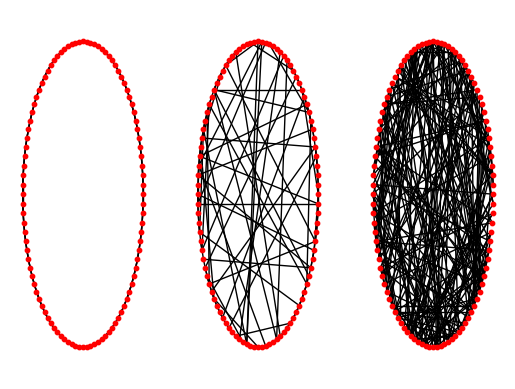

In [21]:
#スモールワールドグラフ
plt.subplot(1,3,1)
ws0=nx.watts_strogatz_graph(100,4,0) #引数はノード数、初期状態の各ノードの次数、エッジのランダム変更割合
nx.draw_circular(ws0,node_size=10,node_color="red")
print("rewiring 0%") #エッジのランダム変更割合0%
print("L=",nx.average_shortest_path_length(ws0)) #平均最短経路距離
print("C=",nx.average_clustering(ws0)) #平均クラスタ係数
plt.subplot(1,3,2)
ws03=nx.watts_strogatz_graph(100,4,0.3)
nx.draw_circular(ws03,node_size=10,node_color="red")
print("rewiring 30%") #エッジのランダム変更割合30%
print("L=",nx.average_shortest_path_length(ws03))
print("C=",nx.average_clustering(ws03))
plt.subplot(1,3,3)
ws1=nx.watts_strogatz_graph(100,4,1)
nx.draw_circular(ws1,node_size=10,node_color="red")
print("rewiring 100%") #エッジのランダム変更割合100%
print("L=",nx.average_shortest_path_length(ws1))
print("C=",nx.average_clustering(ws1))

vertex pair: 4 and 5
neighbors of 4 : [0, 6, 10]
neighbors of 5 : [0, 6, 10, 16]
degree of 4 : 3
degree of 5 : 4
common neighbors: 3
Jaccard coefficient: 0.75
Adamic/Adar: 1.9922605072935597
preferential attachment: 12


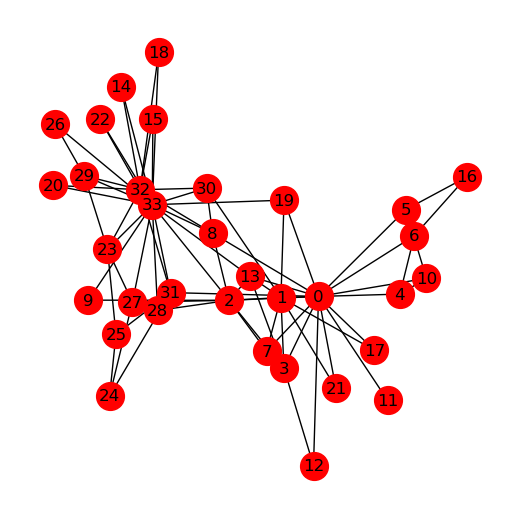

In [22]:
#ネットワークの２つのノード（4と5）の頂点間類似度
G=nx.karate_club_graph()
plt.figure(figsize=(5,5))
nx.draw_spring(G,node_size=400,node_color="red",with_labels=True)
x=4
y=5
print("vertex pair:",x,"and",y)
print("neighbors of",x,":",list(G.neighbors(x))) #xの隣接ノード
print("neighbors of",y,":",list(G.neighbors(y))) #yの隣接ノード
print("degree of",x,":",G.degree(x))
print("degree of",y,":",G.degree(y))
print("common neighbors:",len(list(nx.common_neighbors(G,x,y))))  
print("Jaccard coefficient:",list(nx.jaccard_coefficient(G,[(x,y)]))[0][2])
print("Adamic/Adar:",list(nx.adamic_adar_index(G,[(x,y)]))[0][2])
print("preferential attachment:",list(nx.preferential_attachment(G,[(x,y)]))[0][2])

common neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
preferential attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]


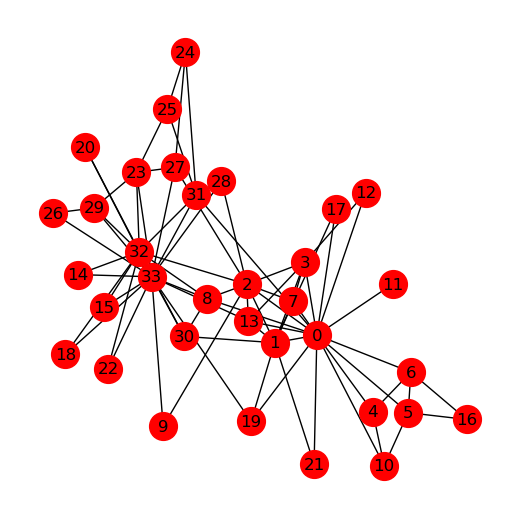

In [23]:
#頂点間類似度によるリンク予測
CN=[]
JC=[]
AA=[]
PA=[]
k=10
G=nx.karate_club_graph()
plt.figure(figsize=(5,5))
nx.draw_spring(G,node_size=400,node_color="red",with_labels=True)
n=nx.number_of_nodes(G)
for x in range(n):
    for y in range(x+1,n):
        if not(G.has_edge(x,y)): #ノード間にエッジがない場合
            #4つの類似度を計算して、（頂点1、頂点2、頂点間類似度の値）のタプルでそれぞれのリストに格納
            CN.append(tuple([x,y,len(list(nx.common_neighbors(G,x,y)))]))
            JC.append(list(nx.jaccard_coefficient(G,[(x,y)]))[0])
            AA.append(list(nx.adamic_adar_index(G,[(x,y)]))[0])
            PA.append(list(nx.preferential_attachment(G,[(x,y)]))[0])
print("common neighbors")
print(sorted(CN,key=lambda x:x[2],reverse=True)[:k]) #類似度の降順にリストをソートして上位10個を表示
print("Jaccard coefficient")
print(sorted(JC,key=lambda x:x[2],reverse=True)[:k])
print("Adamic/Adar")
print(sorted(AA,key=lambda x:x[2],reverse=True)[:k])
print("preferential attachment")
print(sorted(PA,key=lambda x:x[2],reverse=True)[:k])

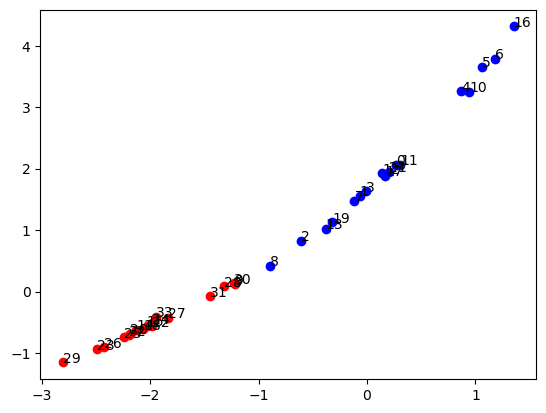

In [24]:
#network embedding(word2vec)
def make_random_walks(G,num_of_walk,length_of_walk):
    walks=list()
    for i in range(num_of_walk): #ランダムウォークの回数
        node_list=list(G.nodes())
        for node in node_list: #各ノード
            current_node=node #最初のノード
            walk=list()
            walk.append(str(node))
            for j in range(length_of_walk): #初期ノードからの長さ
                next_node=random.choice(list(G.neighbors(current_node))) #隣接ノードから移動先をランダム選択
                walk.append(str(next_node))
                current_node=next_node #基準となるノードの更新
            walks.append(walk)
    return walks

G=nx.karate_club_graph()
walks=make_random_walks(G,100,20) #各ノードごとに長さ21のノード列が100個ずつ作成される
model=word2vec(walks,min_count=0,vector_size=2,window=5,workers=1) #各ノードを2次元ベクトル座標に変換

x=list()
y=list()
node_list=list()
colors=list()
fig,ax=plt.subplots()
for node in G.nodes():
    vector=model.wv[str(node)] #各ノードのベクトル
    x.append(vector[0]) #1つ目のベクトル
    y.append(vector[1]) #2つ目のベクトル
    ax.annotate(str(node),(vector[0],vector[1]))
    if G.nodes[node]["club"]=="Officer": #ノードの情報から各ノードの色を設定
        colors.append("r")
    else:
        colors.append("b")
for i in range(len(x)):
    ax.scatter(x[i],y[i],c=colors[i]) #ベクトル座標と色を描画
plt.show()

In [25]:
#network embeddingによるリンク予測
G=nx.karate_club_graph()
walks=make_random_walks(G,100,20)
model=word2vec(walks,min_count=0,vector_size=5,window=5,workers=1) #各ノードを5次元ベクトルに変換

visit=list()
for node in G.nodes():
    vector=model.wv[str(node)] 
    print(node,":",vector)
    visit.append(vector)

DW=[]
k=10
n=nx.number_of_nodes(G)
for x in range(n):
    for y in range(x+1,n):
        if not(G.has_edge(x,y)): #ノードxとy間でエッジが無い場合
            DW.append(tuple([x,y,np.linalg.norm(visit[x]-visit[y])])) #ノードとユークリッド距離を格納
print("link prediction based on network embedding")
print(sorted(DW,key=lambda x:x[2],reverse=False)[:k]) #距離の昇順にタプルをソート　距離が近い（頂点間類似度が高い）上位10個を表示

0 : [-1.7182993   1.1154507   0.6850187  -0.52944905  0.5400342 ]
1 : [-1.0753925   1.1018062   1.7737589  -0.89989555 -0.68866646]
2 : [ 0.24246208  0.6085592   0.8174821  -1.3788266  -0.32205757]
3 : [-1.336096    0.963775    1.4274719  -1.441124   -0.41501993]
4 : [-2.1767025   1.7916077   0.00975528  1.0981113   1.6884192 ]
5 : [-2.4012816  1.8678286 -0.4325765  0.8254838  2.2060568]
6 : [-2.5013523   1.8869596  -0.36780754  0.6816615   2.085776  ]
7 : [-1.1596036   1.1903944   0.9135023  -1.3563708  -0.61992115]
8 : [0.6498887  0.64183253 0.8447192  0.18445256 0.24332757]
9 : [ 1.0248595   0.61157125  0.545375   -0.7839498  -0.21348849]
10 : [-2.3394911   1.674297   -0.20299374  0.74645513  1.9413142 ]
11 : [-1.5947084   1.4956462   0.39170206 -0.04598209  0.2365463 ]
12 : [-1.5909319   1.4573848   0.7109733  -0.91194916 -0.33203477]
13 : [-0.34688386  1.1571203   0.6400754  -0.9625143  -0.73540086]
14 : [2.1950808  0.29919842 0.9995263  0.04850784 0.45976773]
15 : [2.1677356  0.2

In [26]:
#--------------------表形式データからグラフを作成--------------------
path='C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\test data\\wang_count_table.txt'
df=pd.read_table(path,index_col=0)
df #行が遺伝子、列が細胞

,SRX003935,SRX003921,SRX003924,SRX003923,SRX003925,SRX003932,SRX003920,SRX003922,SRX001291,SRX001364,...,SRX001367,SRX001368,SRX003931,SRX003929,SRX003928,SRX003934,SRX003926,SRX003927,SRX003930,SRX003933
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1,12,22,16,6,18,6,13,1,0,...,2,0,9,5,55,4,1,15,4,38
ENSG00000000005,0,0,0,0,0,42,0,51,0,0,...,0,0,3,1,0,1,1,3,0,0
ENSG00000000419,25,13,74,26,20,6,6,1,6,2,...,11,12,8,7,10,17,8,19,10,30
ENSG00000000457,65,19,22,26,30,9,14,14,12,7,...,26,29,12,8,13,25,8,11,24,38
ENSG00000000460,12,0,5,8,5,0,1,0,0,0,...,5,1,0,1,1,3,2,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRG_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LRG_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LRG_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#各遺伝子の平均発現量を正規化
mean_expressons=np.mean(df.values,axis=1) #各遺伝子の平均発現量
mean_expressons[mean_expressons==0]=1e-12 #0除算エラーにならないように0を小さな値に変える
log_mean_expressions=np.log1p(mean_expressons) #対数変換
gene_df=pd.DataFrame(log_mean_expressions,
                     index=df.index,columns=['Mean_expressions'])
gene_df

,Mean_expressions
gene,
ENSG00000000003,2.438387e+00
ENSG00000000005,1.729239e+00
ENSG00000000419,2.775426e+00
ENSG00000000457,3.099273e+00
ENSG00000000460,1.290984e+00
...,...
LRG_94,1.000000e-12
LRG_96,1.000000e-12
LRG_97,1.000000e-12


In [28]:
#平均発現量の高い遺伝子上位100個を取り出す
genes_sorted=gene_df.sort_values(by=['Mean_expressions'],ascending=False) #降順にソート
top_100_genes=genes_sorted.head(100)
top_100_genes

,Mean_expressions
gene,
ENSG00000198888,11.570176
ENSG00000198727,11.478386
ENSG00000198840,11.146627
ENSG00000198886,11.008394
ENSG00000198938,10.717904
...,...
ENSG00000185650,7.991854
ENSG00000089597,7.990931
ENSG00000189060,7.988111


In [29]:
top_genes_df=df.loc[top_100_genes.index] #上位100個の遺伝子の情報
top_genes_df=top_genes_df.T
top_genes_df

gene,ENSG00000198888,ENSG00000198727,ENSG00000198840,ENSG00000198886,ENSG00000198938,ENSG00000198786,ENSG00000167658,ENSG00000104879,ENSG00000198695,ENSG00000133392,...,ENSG00000167468,ENSG00000179262,ENSG00000122304,ENSG00000184009,ENSG00000106211,ENSG00000185650,ENSG00000089597,ENSG00000189060,ENSG00000184897,ENSG00000108518
SRX003935,62494,68875,29839,32997,36278,44376,19287,7,18366,37,...,2137,1118,0,4192,734,4936,2734,3702,3629,3915
SRX003921,22439,38818,9254,16065,10781,24014,78461,6,9052,40,...,1928,1767,0,6737,10315,4107,4072,1914,2814,4308
SRX003924,42893,45049,17156,26224,16316,29423,45489,7,12152,22,...,1696,2635,0,3322,1158,621,7392,6616,4352,10997
SRX003923,19842,44554,11071,23680,13646,27773,40230,7,14221,15,...,2118,2314,1,7406,8083,1196,4816,6262,5528,2986
SRX003925,35762,76676,21623,48116,12447,55562,25843,2,30603,35,...,2238,1847,0,3911,3073,2106,6044,4370,3021,3241
SRX003932,476565,189053,133680,104696,78937,39493,89078,20,14820,14235,...,12311,4585,0,8091,3552,16696,4779,2600,6794,5814
SRX003920,190967,118144,115353,90021,50736,49493,10225,4,20248,605,...,1098,1058,0,1940,196,368,1298,1285,1074,664
SRX003922,106872,87735,43579,33738,23529,31272,36600,14074,12487,3917,...,8386,2015,0,2336,1148,3851,1946,1152,2731,1996
SRX001291,49432,47967,23819,33472,24017,22942,6319,1,9392,143,...,537,482,0,767,61,30,694,1470,758,302
SRX001364,38721,48108,22413,49267,31202,22639,5490,7,8998,183,...,442,407,0,607,48,34,577,917,657,218


In [30]:
#各列（遺伝子発現量）について相関行列を作成
corr=top_genes_df.corr()
corr

gene,ENSG00000198888,ENSG00000198727,ENSG00000198840,ENSG00000198886,ENSG00000198938,ENSG00000198786,ENSG00000167658,ENSG00000104879,ENSG00000198695,ENSG00000133392,...,ENSG00000167468,ENSG00000179262,ENSG00000122304,ENSG00000184009,ENSG00000106211,ENSG00000185650,ENSG00000089597,ENSG00000189060,ENSG00000184897,ENSG00000108518
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000198888,1.000000,0.759368,0.681023,0.663093,0.578168,0.385819,0.439051,0.120416,0.280004,0.200937,...,0.635780,0.223814,0.059381,0.243340,0.066083,0.628517,-0.000579,-0.142570,0.321069,0.099939
ENSG00000198727,0.759368,1.000000,0.918507,0.931576,0.901017,0.613470,0.445339,0.289009,0.553911,0.577268,...,0.402848,0.387699,0.108358,0.096195,0.339390,0.465667,-0.064875,-0.056746,0.199240,0.085410
ENSG00000198840,0.681023,0.918507,1.000000,0.883516,0.809054,0.666920,0.324680,0.404821,0.661393,0.457514,...,0.292680,0.438581,0.141336,-0.045350,0.308898,0.328094,-0.156058,-0.246751,-0.039158,0.020738
ENSG00000198886,0.663093,0.931576,0.883516,1.000000,0.890374,0.591065,0.309843,0.346132,0.582959,0.541672,...,0.224129,0.413682,0.046993,-0.033886,0.281671,0.312147,-0.168512,-0.115917,-0.004959,-0.023536
ENSG00000198938,0.578168,0.901017,0.809054,0.890374,1.000000,0.443413,0.340018,0.067273,0.373762,0.759987,...,0.266643,0.183361,0.194242,0.124668,0.309302,0.428475,-0.086410,-0.012029,0.158884,0.107158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000185650,0.628517,0.465667,0.328094,0.312147,0.428475,-0.165925,0.742372,-0.069962,-0.141469,0.512863,...,0.734899,0.134581,0.162983,0.694156,0.499343,1.000000,0.422624,-0.113909,0.653647,0.574198
ENSG00000089597,-0.000579,-0.064875,-0.156058,-0.168512,-0.086410,-0.216577,0.508297,-0.196328,-0.120521,0.256500,...,0.378276,-0.017517,0.322164,0.698122,0.344360,0.422624,1.000000,0.536740,0.603238,0.822234
ENSG00000189060,-0.142570,-0.056746,-0.246751,-0.115917,-0.012029,0.098449,0.083410,-0.220247,-0.018213,0.006827,...,-0.071059,-0.120564,0.022845,0.267832,-0.021512,-0.113909,0.536740,1.000000,0.579281,0.347934


In [31]:
#グラフの作成

#データフレームをグラフ作成用に変換
num_index=corr.index.to_numpy() #データフレームのindexをnumpy配列に変換
num_columns=corr.columns.to_numpy() #データフレームのcolumnsをnumpy配列に変換
sources=np.repeat(num_index,100) #頂点の始点
targets=np.tile(num_columns,100) #頂点の終点 配列を指定回数だけ繰り返し、それが結合された配列
data=corr.values.flatten() #重みとなる各相関係数　2次元配列を１次元に変換
data

corr_df=pd.DataFrame({
    'source':sources,
    'target':targets,
    'weight':data
})
corr_df

,source,target,weight
0,ENSG00000198888,ENSG00000198888,1.000000
1,ENSG00000198888,ENSG00000198727,0.759368
2,ENSG00000198888,ENSG00000198840,0.681023
3,ENSG00000198888,ENSG00000198886,0.663093
4,ENSG00000198888,ENSG00000198938,0.578168
...,...,...,...
9995,ENSG00000108518,ENSG00000185650,0.574198
9996,ENSG00000108518,ENSG00000089597,0.822234
9997,ENSG00000108518,ENSG00000189060,0.347934
9998,ENSG00000108518,ENSG00000184897,0.600036


In [32]:
#重みが1（自己ループ）と0.7以下のものを削除
select_df=corr_df[corr_df['weight']!=1]
select_df=select_df[select_df['weight']>0.7]
select_df

,source,target,weight
1,ENSG00000198888,ENSG00000198727,0.759368
36,ENSG00000198888,ENSG00000100234,0.828533
38,ENSG00000198888,ENSG00000177666,0.735783
52,ENSG00000198888,ENSG00000074181,0.743603
77,ENSG00000198888,ENSG00000129538,0.759548
...,...,...,...
9925,ENSG00000108518,ENSG00000161016,0.709661
9969,ENSG00000108518,ENSG00000130726,0.714473
9973,ENSG00000108518,ENSG00000085063,0.768577
9981,ENSG00000108518,ENSG00000130175,0.895741


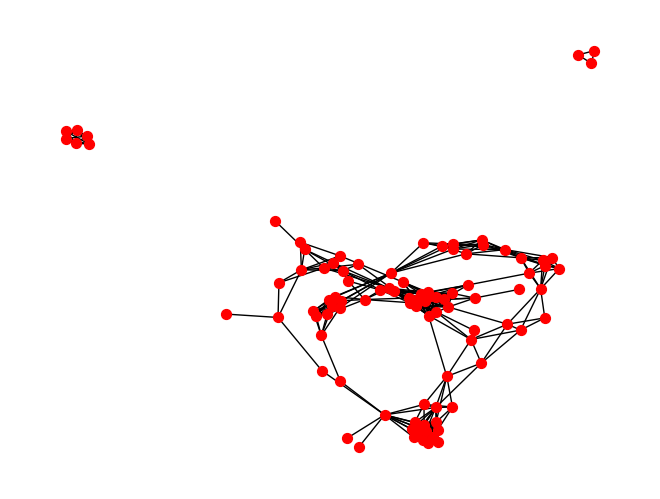

In [33]:
#グラフを作成
G=nx.Graph()
for index, row in select_df.iterrows(): #１行ずつ取り出す
    G.add_edge(row['source'],row['target'],weight=row['weight']) #エッジ、ノード、重みをグラフに追加

nx.draw(G,node_size=50,node_color="red",with_labels=False)